## Attention

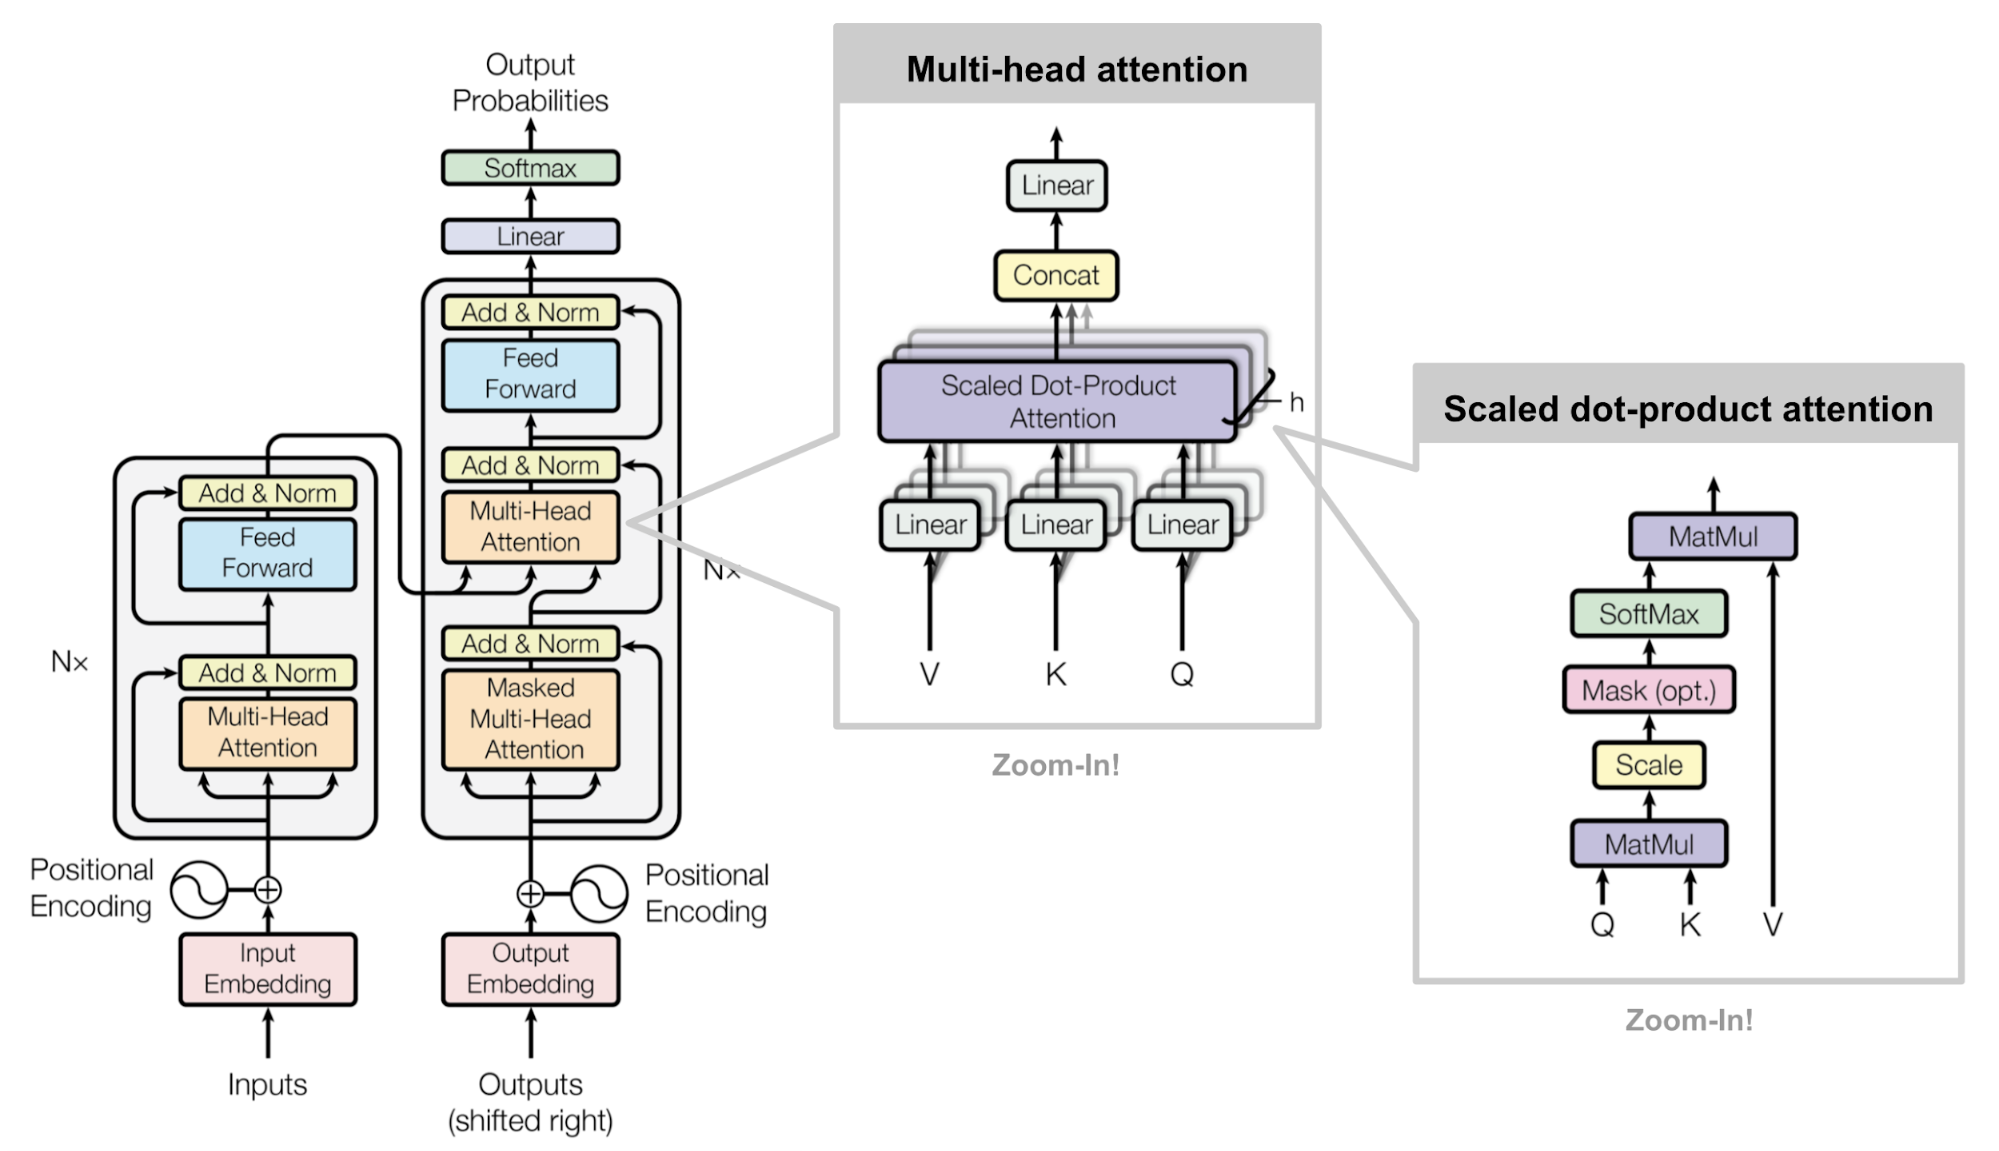


Attention is a layer of calculations that let your model focus on the most important parts of the sequence for each step. Queries, values, and keys are representations of the encoder and decoder hidden states. And they're used to retrieve information inside the attention layer by calculating the similarity between the decoder queries and the encoder key-value pairs.

In Transformer, there are three types of attention in terms of the source of queries and key-value pairs:

**Self-attention**. In the Transformer encoder, we set Q = K = V = X in the equation  Attention(𝑄,𝐾,𝑉)=softmax(𝑄𝐾𝑇𝑑𝑘√)𝑉 , where X is the outputs of the previous layer.

**Masked Self-attention**. In the Transformer decoder, the self-attention is restricted such that queries at each position can only attend to all key-value pairs up to and including that position. This is typically done using a mask matrix added to the attention scores, where the illegal positions are masked out with 𝐴𝑖𝑗 = −∞ if 𝑖 < 𝑗 2 . It's a kind of self-attention that prevent from see future tokens and is often referred to as autoregressive. Sometimes, it's called causal attention, this term seems to be borrowed from the causal system, where the output depends on past and current inputs but not future inputs.

**Cross-attention**. The queries are projected from the outputs of the previous (decoder) layer, whereas the keys and values are projected using the outputs of the encoder.

Thus, the Transformer uses multi-head attention in three different ways:

**In "encoder-decoder attention" layers**, the queries come from the previous decoder layer, and the keys and values come from the output of the encoder. This allows every position in the decoder to attend over all positions in the input sequence. This emulates the typical encoder-decoder attention mechanisms in sequence-to-sequence models.
MultiHead(𝑄,𝐾,𝑉)=MultiHead(𝑋𝑒,𝑋𝑒,𝑋𝑑) 

**Self-attention layers in the encoder.** In a self-attention layer all of the keys, values and queries come from the same place, in this case, the output of the previous layer in the encoder. Each position in the encoder can attend to all positions in the previous layer of the encoder.
MultiHead(𝑄,𝐾,𝑉)=MultiHead(𝑋𝑒,𝑋𝑒,𝑋𝑒) 

**Self-attention layers in the decoder** allow each position in the decoder to attend to all positions in the decoder up to and including that position. We need to prevent leftward information flow in the decoder to preserve the auto-regressive property. We implement this inside of scaled dot-product attention by masking out (setting to  −∞ ) all values in the input of the softmax which correspond to illegal connections.
MultiHead(𝑄,𝐾,𝑉)=MultiHead(𝑋𝑑,𝑋𝑑,𝑋𝑑)

### Attention function 

Assume, we have the following input vectors:

In [ ]:
import torch

x = [
  [2, 0, 1, 0, 3, 5, 7, 2, 7, 7, 3, 1, 0, 0, 10], # Input 1
  [0, 2, 1, 1, 0, 3, 1, 3, 5, 6, 0, 9, 1, 1, 11], # Input 2
  [1, 0, 0, 3, 4, 0, 2, 2, 1, 2, 1, 0, 5, 2, 12]  # Input 3
 ]
x = torch.tensor(x, dtype=torch.float32)

We also have the matrices K, Q and V that we load from the files. 

In [ ]:
import numpy as np

with open('keys.npy', 'rb') as fin:
    w_key = np.load(fin)

with open('queries.npy', 'rb') as fin:
    w_query = np.load(fin)

with open('values.npy', 'rb') as fin:
    w_values = np.load(fin)

Compute attention weights and write the output context vector.
Keep in mind the formula of Attention function in transformers:

                                                                 
$$                                                                         
   \mathrm{Attention}(Q, K, V) = \mathrm{softmax}(\frac{QK^T}{\sqrt{d_k}})V               
$$     

In [ ]:
head = self_attention_function(x, w_key, w_query, w_values)
head

tensor([[22.6601, 22.9824, 23.2869, 22.4588, 22.3940, 27.5324, 15.7572, 32.4877,
         19.7711, 18.7392, 16.2787, 21.9531, 30.6469, 33.1391, 19.4321, 28.8606,
         25.0991, 32.7638, 32.8557, 20.8447],
        [22.6601, 22.9824, 23.2869, 22.4588, 22.3940, 27.5324, 15.7572, 32.4877,
         19.7711, 18.7392, 16.2787, 21.9531, 30.6469, 33.1391, 19.4321, 28.8606,
         25.0991, 32.7638, 32.8557, 20.8447],
        [22.6601, 22.9824, 23.2869, 22.4588, 22.3940, 27.5324, 15.7572, 32.4877,
         19.7711, 18.7392, 16.2787, 21.9531, 30.6469, 33.1391, 19.4321, 28.8606,
         25.0991, 32.7638, 32.8557, 20.8447]], dtype=torch.float64)

### Answer

In [ ]:
from torch.nn.functional import softmax

def self_attention_function(x, w_key, w_query, w_value):
  # YOUR CODE HERE
  return context_vector

### Multi-head Attention

Using the function you have already realized calculate the Multihead attention.

Assume we have 3 heads. Using matrices below (for the second and the third head, the first one you have already got on the previous step) calculate for the previous input the final output of multi-head attention. 

In [ ]:
# upload matrices
with open('keys1.npy', 'rb') as fin:
    w_key1 = np.load(fin)
    
with open('queries1.npy', 'rb') as fin:
    w_query1 = np.load(fin)
    
with open('values1.npy', 'rb') as fin:
    w_value1 = np.load(fin)

with open('keys2.npy', 'rb') as fin:
    w_key2 = np.load(fin)
    
with open('queries2.npy', 'rb') as fin:
    w_query2 = np.load(fin)
    
with open('values2.npy', 'rb') as fin:
    w_value2 = np.load(fin)

with open('w_0.npy', 'rb') as fin:
    w_multi = np.load(fin)

In [ ]:
# GET heads output for head1 and head2 using the function from previous step
head1 = self_attention_function(x, w_key1, w_query1, w_value1)
head2 = self_attention_function(x, w_key2, w_query2, w_value2)

### Answer

In [ ]:
# COMPUTE Multi-head Attention. 
# YOUR CODE HERE

array([2269.62128087, 2208.17594789, 2105.61066381, 2400.83532034,
       2288.49587988, 2307.04119202, 2327.84428056, 2356.40231569,
       2178.05568709, 2211.80696937, 2172.00588459, 2089.32214978,
       2457.0347679 , 2502.2430255 , 2041.20863218, 2164.10768034,
       2243.63168572, 2220.54178779, 2300.46286568, 2189.57612326])

# Attention is all you need

Read this: https://nlp.seas.harvard.edu/2018/04/03/attention.html

Below is a qick view of the transformer architecture on a simple machine translation example


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
def make_batch(sentences):
    input_batch = [[src_vocab[n] for n in sentences[0].split()]]
    output_batch = [[tgt_vocab[n] for n in sentences[1].split()]]
    target_batch = [[tgt_vocab[n] for n in sentences[2].split()]]
    return torch.LongTensor(input_batch), torch.LongTensor(output_batch), torch.LongTensor(target_batch)

def get_sinusoid_encoding_table(n_position, d_model):
    def cal_angle(position, hid_idx):
        return position / np.power(10000, 2 * (hid_idx // 2) / d_model)
    def get_posi_angle_vec(position):
        return [cal_angle(position, hid_j) for hid_j in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(n_position)])
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])  # dim 2i
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])  # dim 2i+1
    return torch.FloatTensor(sinusoid_table)

def get_attn_pad_mask(seq_q, seq_k):
    batch_size, len_q = seq_q.size()
    batch_size, len_k = seq_k.size()
    pad_attn_mask = seq_k.data.eq(0).unsqueeze(1)  # batch_size x 1 x len_k(=len_q), one is masking. eq(zero) is PAD token
    return pad_attn_mask.expand(batch_size, len_q, len_k)  # batch_size x len_q x len_k

def get_attn_subsequent_mask(seq):
    attn_shape = [seq.size(0), seq.size(1), seq.size(1)]
    subsequent_mask = np.triu(np.ones(attn_shape), k=1)
    subsequent_mask = torch.from_numpy(subsequent_mask).byte()
    return subsequent_mask

def showgraph(attn):
    attn = attn[-1].squeeze(0)[0]
    attn = attn.squeeze(0).data.numpy()
    fig = plt.figure(figsize=(n_heads, n_heads))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attn, cmap='viridis')
    ax.set_xticklabels(['']+sentences[0].split(), fontdict={'fontsize': 14}, rotation=90)
    ax.set_yticklabels(['']+sentences[2].split(), fontdict={'fontsize': 14})
    plt.show()

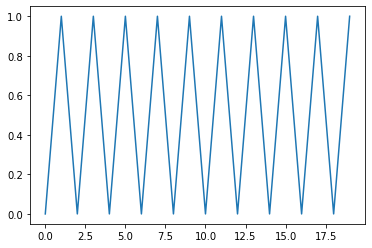

In [ ]:
# POSITIONAL ENCODING
# https://erdem.pl/2021/05/understanding-positional-encoding-in-transformers#positional-encoding-visualization
# https://kazemnejad.com/blog/transformer_architecture_positional_encoding/
d_model = 20
out = get_sinusoid_encoding_table(n_position=3, d_model=d_model)
plt.plot(np.arange(d_model), out[0].data.numpy())

In [ ]:
class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, Q, K, V, attn_mask):
        scores = torch.matmul(Q, K.transpose(-1, -2)) / np.sqrt(d_k) # scores : [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        scores.masked_fill_(attn_mask, -1e9) # Fills elements of self tensor with value where mask is one.
        attn = nn.Softmax(dim=-1)(scores)
        context = torch.matmul(attn, V)
        return context, attn

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self):
        super(MultiHeadAttention, self).__init__()
        self.W_Q = nn.Linear(d_model, d_k * n_heads)
        self.W_K = nn.Linear(d_model, d_k * n_heads)
        self.W_V = nn.Linear(d_model, d_v * n_heads)
        self.linear = nn.Linear(n_heads * d_v, d_model)
        self.layer_norm = nn.LayerNorm(d_model)

    def forward(self, Q, K, V, attn_mask):
        # q: [batch_size x len_q x d_model], k: [batch_size x len_k x d_model], v: [batch_size x len_k x d_model]
        residual, batch_size = Q, Q.size(0)
        # (B, S, D) -proj-> (B, S, D) -split-> (B, S, H, W) -trans-> (B, H, S, W)
        q_s = self.W_Q(Q).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # q_s: [batch_size x n_heads x len_q x d_k]
        k_s = self.W_K(K).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # k_s: [batch_size x n_heads x len_k x d_k]
        v_s = self.W_V(V).view(batch_size, -1, n_heads, d_v).transpose(1,2)  # v_s: [batch_size x n_heads x len_k x d_v]

        attn_mask = attn_mask.unsqueeze(1).repeat(1, n_heads, 1, 1) # attn_mask : [batch_size x n_heads x len_q x len_k]

        # context: [batch_size x n_heads x len_q x d_v], attn: [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        context, attn = ScaledDotProductAttention()(q_s, k_s, v_s, attn_mask)
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, n_heads * d_v) # context: [batch_size x len_q x n_heads * d_v]
        output = self.linear(context)
        return self.layer_norm(output + residual), attn # output: [batch_size x len_q x d_model]


In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self):
        super(EncoderLayer, self).__init__()
        self.enc_self_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, enc_inputs, enc_self_attn_mask):
        enc_outputs, attn = self.enc_self_attn(enc_inputs, enc_inputs, enc_inputs, enc_self_attn_mask) # enc_inputs to same Q,K,V
        enc_outputs = self.pos_ffn(enc_outputs) # enc_outputs: [batch_size x len_q x d_model]
        return enc_outputs, attn

class DecoderLayer(nn.Module):
    def __init__(self):
        super(DecoderLayer, self).__init__()
        self.dec_self_attn = MultiHeadAttention()
        self.dec_enc_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, dec_inputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask):
        dec_outputs, dec_self_attn = self.dec_self_attn(dec_inputs, dec_inputs, dec_inputs, dec_self_attn_mask)
        dec_outputs, dec_enc_attn = self.dec_enc_attn(dec_outputs, enc_outputs, enc_outputs, dec_enc_attn_mask)
        dec_outputs = self.pos_ffn(dec_outputs)
        return dec_outputs, dec_self_attn, dec_enc_attn

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.src_emb = nn.Embedding(src_vocab_size, d_model)
        self.pos_emb = nn.Embedding.from_pretrained(get_sinusoid_encoding_table(src_len+1, d_model),freeze=True)
        self.layers = nn.ModuleList([EncoderLayer() for _ in range(n_layers)])

    def forward(self, enc_inputs): # enc_inputs : [batch_size x source_len]
        enc_outputs = self.src_emb(enc_inputs) + self.pos_emb(torch.LongTensor([[1,2,3,4,0]]))
        enc_self_attn_mask = get_attn_pad_mask(enc_inputs, enc_inputs)
        enc_self_attns = []
        for layer in self.layers:
            enc_outputs, enc_self_attn = layer(enc_outputs, enc_self_attn_mask)
            enc_self_attns.append(enc_self_attn)
        return enc_outputs, enc_self_attns

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.tgt_emb = nn.Embedding(tgt_vocab_size, d_model)
        self.pos_emb = nn.Embedding.from_pretrained(get_sinusoid_encoding_table(tgt_len+1, d_model), freeze=True)
        self.layers = nn.ModuleList([DecoderLayer() for _ in range(n_layers)])

    def forward(self, dec_inputs, enc_inputs, enc_outputs): # dec_inputs : [batch_size x target_len]
        dec_outputs = self.tgt_emb(dec_inputs) + self.pos_emb(torch.LongTensor([[5,1,2,3,4]]))
        dec_self_attn_pad_mask = get_attn_pad_mask(dec_inputs, dec_inputs)
        dec_self_attn_subsequent_mask = get_attn_subsequent_mask(dec_inputs)
        dec_self_attn_mask = torch.gt((dec_self_attn_pad_mask + dec_self_attn_subsequent_mask), 0)
        dec_enc_attn_mask = get_attn_pad_mask(dec_inputs, enc_inputs)

        dec_self_attns, dec_enc_attns = [], []
        for layer in self.layers:
            dec_outputs, dec_self_attn, dec_enc_attn = layer(dec_outputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask)
            dec_self_attns.append(dec_self_attn)
            dec_enc_attns.append(dec_enc_attn)
        return dec_outputs, dec_self_attns, dec_enc_attns

### Feed Forward layer                                                                    

In addition to attention sub-layers, each of the layers in our encoder and decoder contains a fully connected feed-forward network, which is applied to each position separately and identically.

$$\mathrm{FFN}(x)=\max(0, xW_1 + b_1) W_2 + b_2$$                                                                                                                                                
While the linear transformations are the same across different positions, they use different parameters from layer to layer. Another way of describing this is as two convolutions with kernel size 1. The dimensionality of input and output is  $d_{\text{model}}=512$
, and the inner-layer has dimensionality $d_{ff}=2048$. 


In [ ]:
class PoswiseFeedForwardNet(nn.Module):
    def __init__(self):
        super(PoswiseFeedForwardNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.layer_norm = nn.LayerNorm(d_model)

    def forward(self, inputs):
        residual = inputs # inputs : [batch_size, len_q, d_model]
        output = nn.ReLU()(self.conv1(inputs.transpose(1, 2)))
        output = self.conv2(output).transpose(1, 2)
        return self.layer_norm(output + residual)

Epoch: 0001 cost = 1.970178
Epoch: 0002 cost = 2.754146
Epoch: 0003 cost = 3.322139
Epoch: 0004 cost = 5.087333
Epoch: 0005 cost = 6.409103
Epoch: 0006 cost = 3.448600
Epoch: 0007 cost = 5.227469
Epoch: 0008 cost = 3.691727
Epoch: 0009 cost = 4.610610
Epoch: 0010 cost = 2.817700
Epoch: 0011 cost = 1.905889
Epoch: 0012 cost = 1.614199
Epoch: 0013 cost = 1.962460
Epoch: 0014 cost = 2.060333
Epoch: 0015 cost = 1.966160
Epoch: 0016 cost = 1.840265
Epoch: 0017 cost = 1.761405
Epoch: 0018 cost = 1.716899
Epoch: 0019 cost = 1.681334
Epoch: 0020 cost = 1.659106
First head of last state dec_self_attns


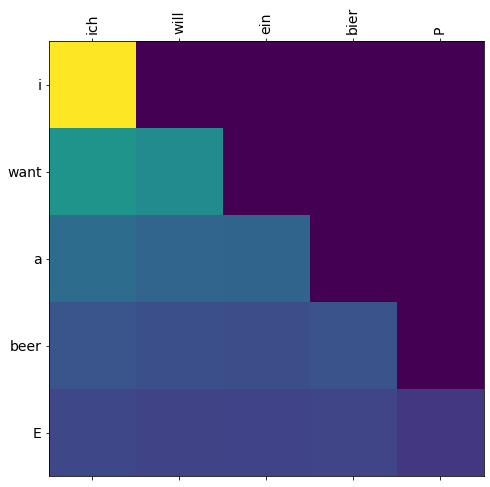

In [ ]:
class Transformer(nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        self.projection = nn.Linear(d_model, tgt_vocab_size, bias=False)
    
    def forward(self, enc_inputs, dec_inputs):
        enc_outputs, enc_self_attns = self.encoder(enc_inputs)
        dec_outputs, dec_self_attns, dec_enc_attns = self.decoder(dec_inputs, enc_inputs, enc_outputs)
        dec_logits = self.projection(dec_outputs) # dec_logits : [batch_size x src_vocab_size x tgt_vocab_size]
        return dec_logits.view(-1, dec_logits.size(-1)), enc_self_attns, dec_self_attns, dec_enc_attns

# S: Symbol that shows starting of decoding input
# E: Symbol that shows starting of decoding output
# P: Symbol that will fill in blank sequence if current batch data size is short than time steps
sentences = ['ich will ein bier P', 'S i want a beer', 'i want a beer E']

# Transformer Parameters
src_vocab = {'P': 0, 'ich': 1, 'will': 2, 'ein': 3, 'bier': 4}
src_vocab_size = len(src_vocab)
tgt_vocab = {'P': 0, 'i': 1, 'want': 2, 'a': 3, 'beer': 4, 'S': 5, 'E': 6}
number_dict = {i: w for i, w in enumerate(tgt_vocab)}
tgt_vocab_size = len(tgt_vocab)

src_len = 5
tgt_len = 5

d_model = 512  # Embedding Size
d_ff = 2048  # FeedForward dimension
d_k = d_v = 64  # dimension of K(=Q), V
n_layers = 6
n_heads = 8

model = Transformer()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

enc_inputs, dec_inputs, target_batch = make_batch(sentences)

for epoch in range(20):
    optimizer.zero_grad()
    outputs, enc_self_attns, dec_self_attns, dec_enc_attns = model(enc_inputs, dec_inputs)
    loss = criterion(outputs, target_batch.contiguous().view(-1))
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
    loss.backward()
    optimizer.step()

# Test
predict, _, _, _ = model(enc_inputs, dec_inputs)
predict = predict.data.max(1, keepdim=True)[1]
# print(sentences[0], '->', [number_dict[n.item()] for n in predict.squeeze()])

print('First head of last state dec_self_attns')
showgraph(dec_self_attns)